In [1]:
from bottomupattention.extract_in_memory import setup, extract_feat_in_memory
import ray

In [15]:
!nvidia-smi

Thu Jun 17 11:19:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.24.02    Driver Version: 465.24.02    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| 30%   30C    P8    23W / 350W |      1MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:25:00.0 Off |                  N/A |
| 30%   

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = "2"

model, cfg = setup("bottomupattention/configs/bua-caffe/extract-bua-caffe-r101.yaml", 10, 100, 2)

ck_running_stats=True)
        )
      )
      (5): BottleneckBlock(
        (conv1): Conv2d(
          1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (conv2): Conv2d(
          256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (conv3): Conv2d(
          256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (6): BottleneckBlock(
        (conv1): Conv2d(
          1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (conv2): Conv2d(
          256, 256, kernel_size=(3, 3), stride=(1,

In [32]:
# Extract features.
img_file = 'bottomupattention/demo/000456.jpg'
feats = ray.get(extract_feat_in_memory.remote(model, img_file, cfg))

In [33]:
feats

{'x': tensor([[0.0000e+00, 1.1137e-02, 3.3574e+00,  ..., 7.7107e+00, 0.0000e+00,
          1.3143e+00],
         [0.0000e+00, 5.0281e-02, 5.8472e+00,  ..., 8.5877e+00, 1.8063e-02,
          3.3319e+00],
         [0.0000e+00, 0.0000e+00, 5.5428e+00,  ..., 2.1773e+00, 0.0000e+00,
          2.5494e-01],
         ...,
         [0.0000e+00, 1.2678e+00, 1.8609e-01,  ..., 2.2880e-01, 3.4216e-01,
          0.0000e+00],
         [7.5045e-03, 0.0000e+00, 0.0000e+00,  ..., 5.0483e+00, 2.0668e-01,
          6.3456e-03],
         [0.0000e+00, 8.0955e+00, 7.2697e-01,  ..., 2.8097e+00, 1.4157e+00,
          0.0000e+00]]),
 'bbox': tensor([[2.8224e+01, 1.0899e+02, 4.8246e+02, 3.4042e+02],
         [1.8531e+02, 5.3759e+01, 4.9938e+02, 3.7438e+02],
         [0.0000e+00, 1.0569e+02, 3.1428e+02, 3.7438e+02],
         [3.6970e+02, 0.0000e+00, 4.8574e+02, 5.2638e+01],
         [1.3174e+02, 1.2495e+02, 1.7628e+02, 1.6354e+02],
         [2.8808e+02, 1.6519e+02, 4.9938e+02, 3.7438e+02],
         [9.3290e+01, 6

In [34]:
with open('bottomupattention/evaluation/objects_vocab.txt', 'r') as f:
    obj_names = f.readlines()
print(len(obj_names))

1600


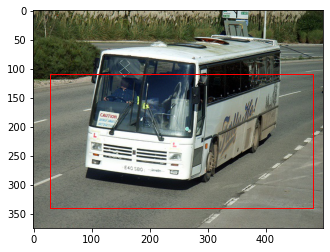

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open(img_file)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)
x = feats['bbox'][roi][0]
y = feats['bbox'][roi][1]
x2 = feats['bbox'][roi][2]
y2 = feats['bbox'][roi][3]

# Create a Rectangle patch
for roi in range(feats['num_bbox']):
    rect = patches.Rectangle((x, y), x2 - x, y2 - y, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

light



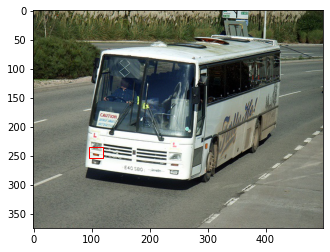

In [56]:
roi = 7

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)
x = feats['bbox'][roi][0]
y = feats['bbox'][roi][1]
x2 = feats['bbox'][roi][2]
y2 = feats['bbox'][roi][3]

# Create a Rectangle patch
rect = patches.Rectangle((x, y), x2 - x, y2 - y, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

print(obj_names[feats['info']['objects_id'][roi]])
plt.show()